<a href="https://colab.research.google.com/github/Walidsobhi/us-accidents-analysis/blob/main/us_accidents_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('us-accidents-analysis')
jovian.set_colab_id('1hgBnuPplv2Zdtac20Zld_yMoCU74DVMl')

     |████████████████████████████████| 68 kB 2.1 MB/s 


# us-accidents-analysis

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="us-accidents-analysis")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/walidsobhi56/us-accidents-analysis


'https://jovian.ai/walidsobhi56/us-accidents-analysis'

## US Accidents Exploratory Data Analysis

 TODO - talk about EDA

 TODO - talk about the dataset (source, what it contains, how it will be useful)

 - Kaggle
 - Informaiton about accidents
 - Can use useful to prevent accidents
 - Notice that this does not contain data about New York

In [ ]:
pip install opendatasets --upgrade --quiet


In [ ]:
import opendatasets as od

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(download_url) 

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [ ]:
data_filename = './us-accidents/US_Accidents_Dec20_updated.csv'

## Data Prepration and Cleaning

1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(data_filename)

In [ ]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,F

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [ ]:
df.describe()


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

### Percentage of missing values per column

In [ ]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

Number                   0.690007
Precipitation(in)        0.336760
Wind_Chill(F)            0.296370
Wind_Speed(mph)          0.084998
Humidity(%)              0.030018
Visibility(mi)           0.029162
Weather_Condition        0.029027
Temperature(F)           0.028385
Wind_Direction           0.027610
Pressure(in)             0.023926
Weather_Timestamp        0.019962
Airport_Code             0.002802
Timezone                 0.001518
Zipcode                  0.000617
City                     0.000055
Nautical_Twilight        0.000055
Astronomical_Twilight    0.000055
Civil_Twilight           0.000055
Sunrise_Sunset           0.000055
Amenity                  0.000000
Bump                     0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
End_Lat                  0.000000
End_Lng                  0.000000
Distance(mi)             0.000000
Description   

In [ ]:
type(missing_percentages)

pandas.core.series.Series

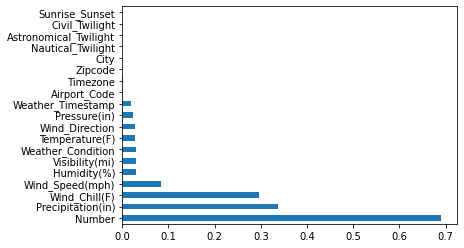

In [ ]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

####Ignore columns that we don't want to use.



## Exploratory Analysis and Visualization

 Columns we'll analyze:
1. City
2. Start Time
3. Start Lat, Start Lng
4. Temperature
5. Weather Condition


In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### City

In [ ]:
df.City

0               Dublin
1               Dayton
2           Cincinnati
3           Cincinnati
4                Akron
              ...     
1516059      Riverside
1516060      San Diego
1516061         Orange
1516062    Culver City
1516063       Highland
Name: City, Length: 1516064, dtype: object

In [ ]:
cities = df.City.unique()
len(cities)

10658

In [ ]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Los Angeles         39984
Miami               36233
Charlotte           22203
Houston             20843
Dallas              19497
                    ...  
Elmore City             1
Loysburg                1
Dane                    1
Rensselaer Falls        1
Bogota                  1
Name: City, Length: 10657, dtype: int64

In [ ]:
cities_by_accident[:20]

Los Angeles     39984
Miami           36233
Charlotte       22203
Houston         20843
Dallas          19497
Sacramento      18431
Orlando         16169
Portland        14805
San Diego       14090
Minneapolis     12653
Atlanta         11854
Chicago         11507
Saint Paul      10084
Phoenix          9934
Raleigh          9516
San Jose         9362
Richmond         8472
Nashville        8381
Riverside        8201
Jacksonville     7815
Name: City, dtype: int64

In [ ]:
type(cities_by_accident)

pandas.core.series.Series

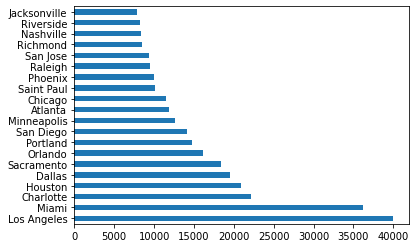

In [ ]:
cities_by_accident[:20].plot(kind='barh')

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

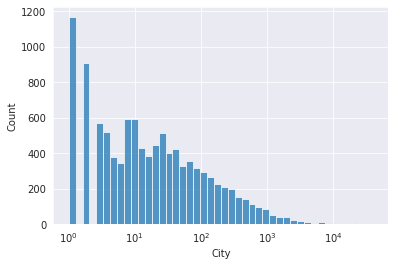

In [ ]:
sns.histplot(cities_by_accident, log_scale=True)

In [ ]:
cities_by_accident[cities_by_accident == 1]

Trego               1
Royston             1
Sudan               1
Loves Park          1
Glenpool            1
                   ..
Elmore City         1
Loysburg            1
Dane                1
Rensselaer Falls    1
Bogota              1
Name: City, Length: 1167, dtype: int64

### Start Time

In [ ]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:15:39
4          2016-02-08 06:51:45
                  ...         
1516059    2019-08-23 18:03:25
1516060    2019-08-23 19:11:30
1516061    2019-08-23 19:00:21
1516062    2019-08-23 19:00:21
1516063    2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: object

In [ ]:
df.Start_Time = pd.to_datetime(df.Start_Time)

- Figure out how to show percentages

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


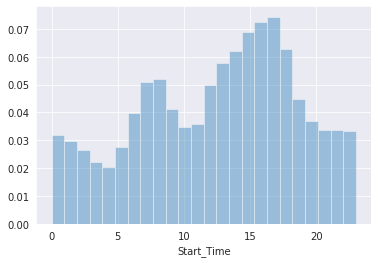

In [ ]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

- A high percentage of accidents occur between 6 am to 10 am (probably people in a hurry to get to work)
- Next higest percentage is 3 pm to 6 pm.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


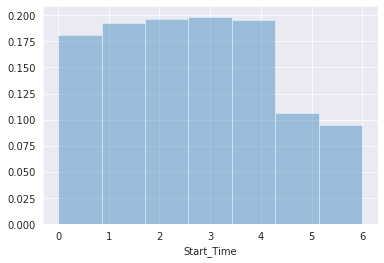

In [ ]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

Is the distribution of accidents by hour the same on weekends as on weekdays.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


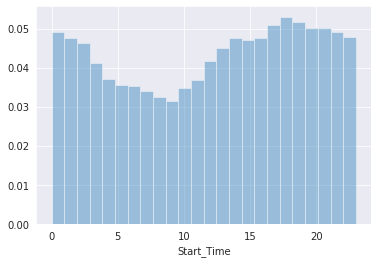

In [ ]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


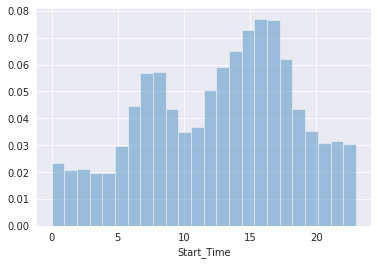

In [ ]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

On Sundays, the peak occurs between 10 am and 3 pm, unlike weekdays

### Start Latitude & Longitude

In [ ]:
df.Start_Lat

0          40.10891
1          39.86542
2          39.10266
3          39.10148
4          41.06213
             ...   
1516059    34.00248
1516060    32.76696
1516061    33.77545
1516062    33.99246
1516063    34.13393
Name: Start_Lat, Length: 1516064, dtype: float64

0          40.10891
1          39.86542
2          39.10266
3          39.10148
4          41.06213
             ...   
1516059    34.00248
1516060    32.76696
1516061    33.77545
1516062    33.99246
1516063    34.13393
Name: Start_Lat, Length: 1516064, dtype: float64

In [ ]:
df.Start_Lng

0          -83.09286
1          -84.06280
2          -84.52468
3          -84.52341
4          -81.53784
             ...    
1516059   -117.37936
1516060   -117.14806
1516061   -117.84779
1516062   -118.40302
1516063   -117.23092
Name: Start_Lng, Length: 1516064, dtype: float64

In [ ]:
sample_df = df.sample(int(0.1 * len(df)))

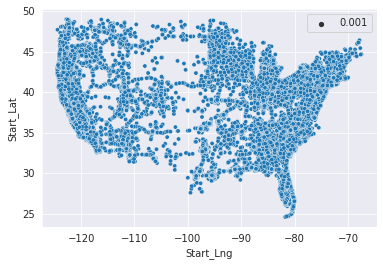

In [ ]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [ ]:
import folium

In [ ]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(40.108909999999995, -83.09286)

In [ ]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])

247118     28.186060
525040     37.977105
541526     33.873719
103833     40.781500
629989     38.907039
             ...    
1073096    34.081828
793624     39.778340
292917     33.462091
594905     46.611288
167003     38.779305
Name: Start_Lat, Length: 100, dtype: float64
247118     -82.415629
525040    -120.315012
541526    -118.257764
103833     -73.652370
629989     -78.005102
              ...    
1073096   -117.702656
793624    -104.895420
292917    -112.243784
594905     -92.553387
167003     -90.364977
Name: Start_Lng, Length: 100, dtype: float64


In [ ]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [ ]:
from folium.plugins import HeatMap

In [ ]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [ ]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

## Ask & answer questions

1. Are there more accidents in warmer or colder areas?
2. Which 5 states have the highest number of accidents? How about per capita?
3. Does New York show up in the data? If yes, why is the count lower if this the most populated city.
4. Among the top 100 cities in number of accidents, which states do they belong to most frequently.
5. What time of the day are accidents most frequent in? - ANSWERED
6. Which days of the week have the most accidents?
7. Which months have the most accidents?
8. What is the trend of accidents year over year (decreasing/increasing?)
9. When is accidents per unit of traffic the highest.

## Summary and Conclusion


Insights:
- No data from New York
- The number of accidents per city decreases exponentially
- Less than 5% of cities have more than 1000 yearly accidents.
- Over 1200 cities have reported just one accident (need to investigate)

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/walidsobhi56/us-accidents-analysis


'https://jovian.ai/walidsobhi56/us-accidents-analysis'